In [41]:
import tensorflow as tf

print(len(tf.config.list_physical_devices('GPU'))>0)

True


In [128]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2
import os
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50, VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

%matplotlib inline

In [43]:
mat = scipy.io.loadmat('C:/Users/rsk13/Desktop/Code/Projects/DL Projects/House Street/DO NOT UPLOAD/Cropped/train_32x32.mat')

In [44]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [45]:
mat['X'].shape

(32, 32, 3, 73257)

In [46]:
mat['y'].shape

(73257, 1)

In [47]:
mat['y'][73256]

array([9], dtype=uint8)

In [48]:
Xtrain = mat['X']
ytrain = mat['y']

print(Xtrain.shape, ytrain.shape)

(32, 32, 3, 73257) (73257, 1)


In [49]:
type(Xtrain)

numpy.ndarray

In [50]:
Xtrain[0]

array([[[ 33,  84,  19, ...,  92, 190, 216],
        [ 30,  76,  54, ...,  78, 188, 217],
        [ 38,  59, 110, ..., 101, 191, 212]],

       [[ 15,  86,  20, ...,  94, 205, 221],
        [ 23,  73,  52, ...,  82, 203, 222],
        [ 19,  66, 111, ..., 105, 206, 217]],

       [[ 15,  77,  25, ..., 114, 220, 226],
        [ 17,  78,  57, ..., 101, 218, 227],
        [ 19,  56, 116, ..., 125, 220, 221]],

       ...,

       [[ 72,  90,  65, ..., 200, 229, 200],
        [ 65,  78, 144, ..., 201, 231, 199],
        [ 56,  69, 223, ..., 203, 224, 191]],

       [[ 82,  88,  78, ..., 192, 229, 193],
        [ 77,  77, 148, ..., 193, 229, 188],
        [ 57,  67, 218, ..., 195, 224, 182]],

       [[ 89,  88,  98, ..., 190, 229, 197],
        [ 79,  78, 158, ..., 191, 228, 189],
        [ 59,  66, 220, ..., 193, 223, 186]]], dtype=uint8)

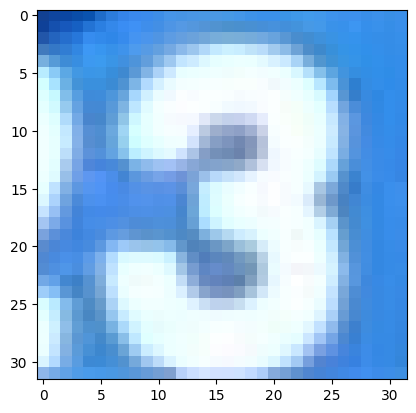

In [51]:
# Xtrain.shape = (32, 32, 3, 73257)
plt.imshow(Xtrain[:,:,:,3])

In [52]:
ytrain[3]

array([3], dtype=uint8)

### 0 has label 10

In [53]:
indices_of_10 = np.where(ytrain == 10)[0]
print(indices_of_10)

[   52    84    93 ... 73193 73220 73239]


In [54]:
ytrain[52] # In reality this number is 0

array([10], dtype=uint8)

In [55]:
ytrain = np.where(ytrain==10,0,ytrain)

In [56]:
# checking again if there are any labels with value 10

indices_of_10 = np.where(ytrain == 10)[0]
print(indices_of_10)

[]


### Randomly displaying 10 images

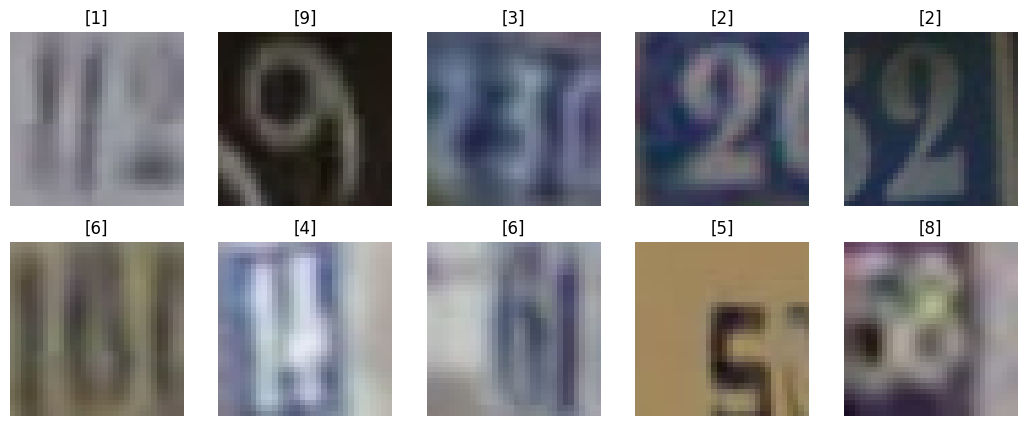

In [57]:
fig = plt.figure(figsize=(13, 5))
columns = 5
rows = 2

# ax enables access to manipulate each of subplots
ax = []

for i in range(rows * columns):
    j = np.random.randint(Xtrain.shape[3], size=1)[0]
    img = Xtrain[:, :, :, j]
    # create subplot and append to ax    
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(ytrain[j]))  # set title
    plt.tick_params(length=0)
    plt.axis('off')
    plt.imshow(img)

### Test images in mat file

In [58]:
test_mat = scipy.io.loadmat('C:/Users/rsk13/Desktop/Code/Projects/DL Projects/House Street/DO NOT UPLOAD/Cropped/test_32x32.mat')

In [59]:
Xtest = test_mat['X']
ytest = test_mat['y']

In [60]:
indices_of_10 = np.where(ytest == 10)[0]
print(indices_of_10)

[    3    21    34 ... 26006 26011 26021]


In [61]:
ytest[3]

array([10], dtype=uint8)

In [62]:
ytest = np.where(ytest==10,0,ytest)
indices_of_10 = np.where(ytest == 10)[0]
print(indices_of_10)

[]


### Randomly displaying 10 images

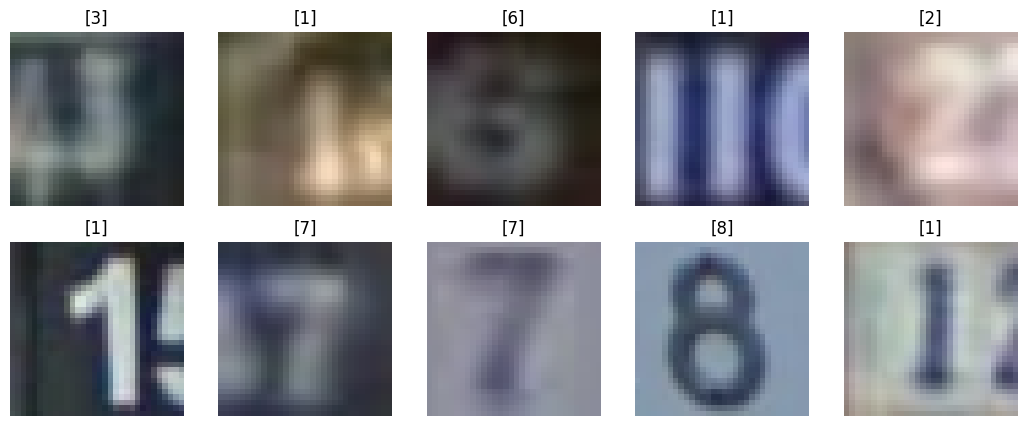

In [63]:
fig = plt.figure(figsize=(13, 5))
columns = 5
rows = 2

# ax enables access to manipulate each of subplots
ax = []

for i in range(rows * columns):
    j = np.random.randint(Xtest.shape[3], size=1)[0]
    img = Xtest[:, :, :, j]
    # create subplot and append to ax    
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(ytest[j]))  # set title
    plt.tick_params(length=0)
    plt.axis('off')
    plt.imshow(img)

In [64]:
print('Xtrain = {}, ytrain = {}'.format(Xtrain.shape,ytrain.shape))
print('Xtest = {}, ytest = {}'.format(Xtest.shape,ytest.shape))

Xtrain = (32, 32, 3, 73257), ytrain = (73257, 1)
Xtest = (32, 32, 3, 26032), ytest = (26032, 1)


### Converting images to gray-scale (reducing channels)

In [65]:
Xtrain.shape

(32, 32, 3, 73257)

In [66]:
Xtrain_grey = Xtrain.mean(axis=2,keepdims=True)
Xtest_grey = Xtest.mean(axis=2,keepdims=True)

In [67]:
Xtrain_grey.shape, Xtest_grey.shape

((32, 32, 1, 73257), (32, 32, 1, 26032))

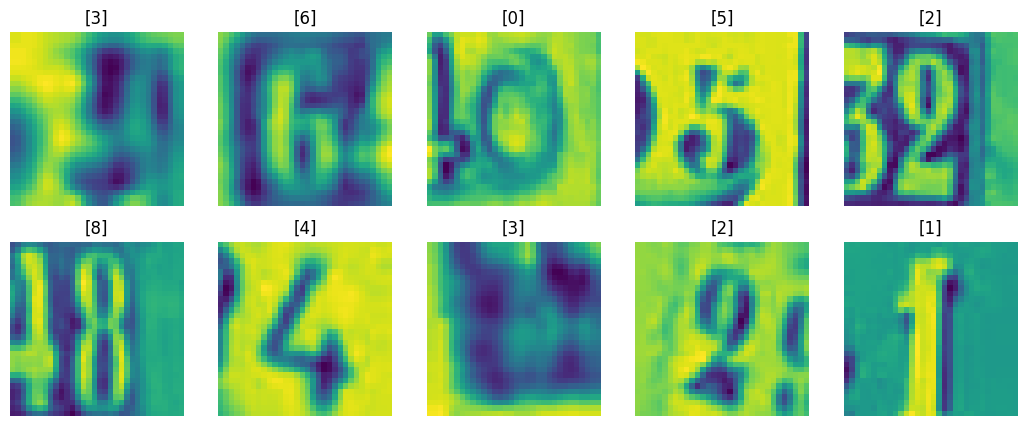

In [68]:
fig = plt.figure(figsize=(13, 5))
columns = 5
rows = 2

# ax enables access to manipulate each of subplots
ax = []

for i in range(rows * columns):
    j = np.random.randint(Xtrain_grey.shape[3], size=1)[0]
    img = Xtrain_grey[:, :, :, j]
    # create subplot and append to ax    
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(ytrain[j]))  # set title
    plt.tick_params(length=0)
    plt.axis('off')
    plt.imshow(img)

### Normalization

In [69]:
np.min(Xtrain_grey[0]), np.max(Xtrain_grey[0])

(0.0, 255.0)

In [70]:
Xtrain_grey = Xtrain_grey/255
Xtest_grey = Xtest_grey/255

In [122]:
Xtrain= Xtrain/255
Xtest = Xtest/255

# CNN model

In [71]:
Xtrain_grey.shape

(32, 32, 1, 73257)

In [72]:
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(32,(2,2),padding='valid',activation='selu',input_shape=(32,32,1),
                    kernel_regularizer='l2',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(32,(2,2),padding='valid',activation='selu',kernel_regularizer='l2',
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(32,(2,2),padding='valid',activation='selu',kernel_regularizer='l2',
                     kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    for i in range(hp.Int('num_dense_layers',min_value=1,max_value=8)):
        model.add(Dense(
                hp.Int('num_units'+str(i),min_value=8,max_value=256,step=8),
                hp.Choice('activation'+str(i),values=['relu','selu','sigmoid','tanh']),
                kernel_initializer='he_uniform',kernel_regularizer='l2'))
        model.add(Dropout(0.3))
        model.add(BatchNormalization())
     
    # last layer
    model.add(Dense(10,activation='softmax'))
    model.compile(hp.Choice('optimizer'+str(i),values=['adam','adagrad','adadelta','rmsprop''sgd']),
                 loss=['sparse_categorical_crossentropy'], metrics=['accuracy'])
    return model

In [73]:
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective=['val_accuracy'],max_trials=3,
                       directory='Tuned Params', project_name='trial2')

INFO:tensorflow:Reloading Tuner from Tuned Params\trial2\tuner0.json


In [74]:
Xtrain_grey.shape

(32, 32, 1, 73257)

In [75]:
tuner.search(np.moveaxis(Xtrain_grey,-1,0),ytrain,validation_data=(np.moveaxis(Xtest_grey,-1,0),ytest),
             validation_split=0.3,epochs=3)

INFO:tensorflow:Oracle triggered exit


In [76]:
tuner.get_best_hyperparameters()[0].values

{'num_dense_layers': 1,
 'num_units0': 24,
 'activation0': 'tanh',
 'optimizer0': 'adam',
 'num_units1': 96,
 'activation1': 'relu',
 'num_units2': 256,
 'activation2': 'relu',
 'num_units3': 104,
 'activation3': 'tanh',
 'num_units4': 80,
 'activation4': 'sigmoid',
 'num_units5': 152,
 'activation5': 'sigmoid',
 'num_units6': 256,
 'activation6': 'tanh',
 'num_units7': 208,
 'activation7': 'relu',
 'optimizer7': 'adam'}

In [77]:
model = tuner.get_best_models()[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [78]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)

mc = ModelCheckpoint(
    filepath='best_model.h5',
    save_weights_only=True,
    save_best_only=True,   
    monitor='val_accuracy',    
    verbose=1               
)

In [79]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [80]:
history = model.fit(np.moveaxis(Xtrain_grey[:,:,:,:30000],-1,0),ytrain[:30000],
                    validation_data=(np.moveaxis(Xtest_grey[:,:,:,:30000],-1,0),ytest[:30000]),
                    validation_split=0.3,epochs=30,batch_size=32,initial_epoch=3,callbacks=[early_stopping,mc])

Epoch 4/30
937/938 [============================>.] - ETA: 0s - loss: 0.8986 - accuracy: 0.7867
Epoch 4: val_accuracy improved from -inf to 0.77604, saving model to best_model.h5
938/938 [==============================] - 36s 37ms/step - loss: 0.8986 - accuracy: 0.7867 - val_loss: 0.9154 - val_accuracy: 0.7760
Epoch 5/30
937/938 [============================>.] - ETA: 0s - loss: 0.8953 - accuracy: 0.7857
Epoch 5: val_accuracy improved from 0.77604 to 0.79149, saving model to best_model.h5
938/938 [==============================] - 32s 34ms/step - loss: 0.8954 - accuracy: 0.7856 - val_loss: 0.9034 - val_accuracy: 0.7915
Epoch 6/30
937/938 [============================>.] - ETA: 0s - loss: 0.8723 - accuracy: 0.7918
Epoch 6: val_accuracy improved from 0.79149 to 0.80251, saving model to best_model.h5
938/938 [==============================] - 37s 40ms/step - loss: 0.8723 - accuracy: 0.7918 - val_loss: 0.8451 - val_accuracy: 0.8025
Epoch 7/30
938/938 [==============================] - ETA:

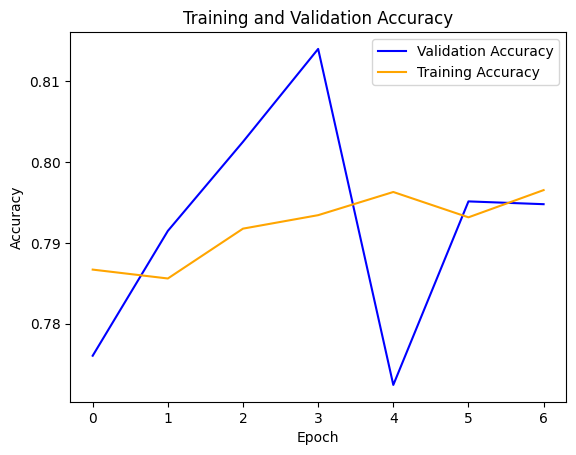

In [81]:
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()

plt.show()

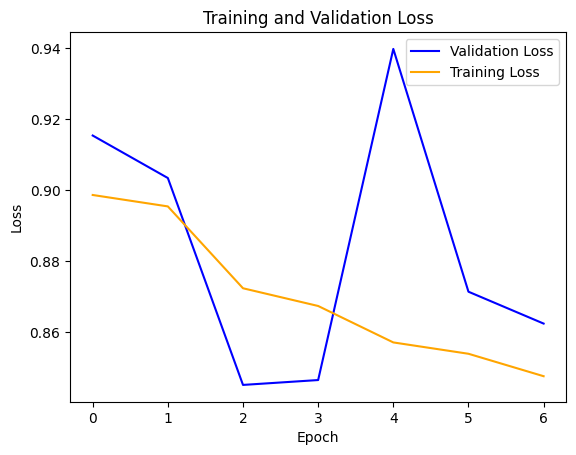

In [82]:
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='orange', label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.legend()

plt.show()

## LeNet-5 architecture

In [83]:
lenet_model = Sequential()

lenet_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='tanh', input_shape = (32,32,1)))
lenet_model.add(AveragePooling2D(pool_size=(2, 2),strides=2))

lenet_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='tanh'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2),strides=2))

lenet_model.add(Flatten())

lenet_model.add(Dense(120,activation='tanh'))
lenet_model.add(Dense(84,activation='tanh'))
lenet_model.add(Dense(10,activation='softmax'))

In [84]:
lenet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)

lenet_mc = ModelCheckpoint(
    filepath='lenet_best_model.h5',
    save_weights_only=True,
    save_best_only=True,   
    monitor='val_accuracy',    
    verbose=1               
)

In [86]:
lenet_history = lenet_model.fit(np.moveaxis(Xtrain_grey[:,:,:,:30000],-1,0),ytrain[:30000],
                    validation_data=(np.moveaxis(Xtest_grey[:,:,:,:30000],-1,0),ytest[:30000]),
                    validation_split=0.3,epochs=30,batch_size=32,callbacks=[early_stopping,lenet_mc])

Epoch 1/30
937/938 [============================>.] - ETA: 0s - loss: 2.2141 - accuracy: 0.2248
Epoch 1: val_accuracy improved from -inf to 0.23759, saving model to lenet_best_model.h5
938/938 [==============================] - 27s 28ms/step - loss: 2.2141 - accuracy: 0.2249 - val_loss: 2.2319 - val_accuracy: 0.2376
Epoch 2/30
936/938 [============================>.] - ETA: 0s - loss: 2.0428 - accuracy: 0.3146
Epoch 2: val_accuracy improved from 0.23759 to 0.56876, saving model to lenet_best_model.h5
938/938 [==============================] - 32s 34ms/step - loss: 2.0415 - accuracy: 0.3151 - val_loss: 1.3550 - val_accuracy: 0.5688
Epoch 3/30
937/938 [============================>.] - ETA: 0s - loss: 0.9632 - accuracy: 0.7072
Epoch 3: val_accuracy improved from 0.56876 to 0.71059, saving model to lenet_best_model.h5
938/938 [==============================] - 30s 32ms/step - loss: 0.9630 - accuracy: 0.7072 - val_loss: 0.9289 - val_accuracy: 0.7106
Epoch 4/30
937/938 [====================

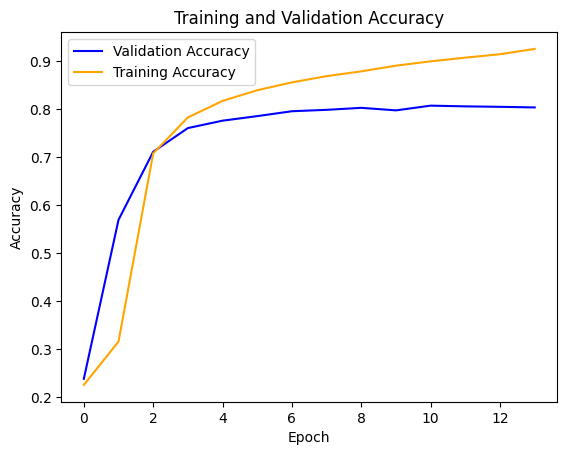

In [87]:
plt.plot(lenet_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.plot(lenet_history.history['accuracy'], color='orange', label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()

plt.show()

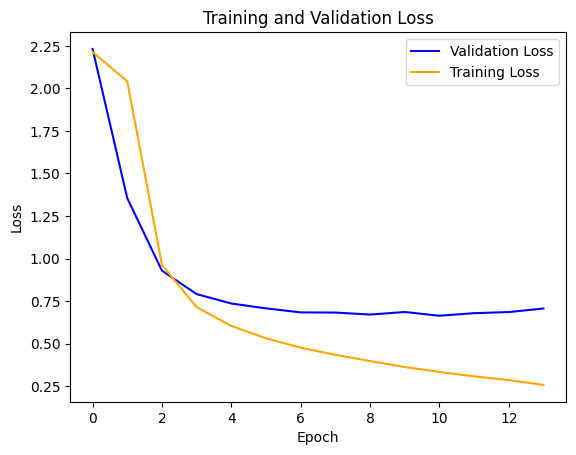

In [88]:
plt.plot(lenet_history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(lenet_history.history['loss'], color='orange', label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.legend()

plt.show()